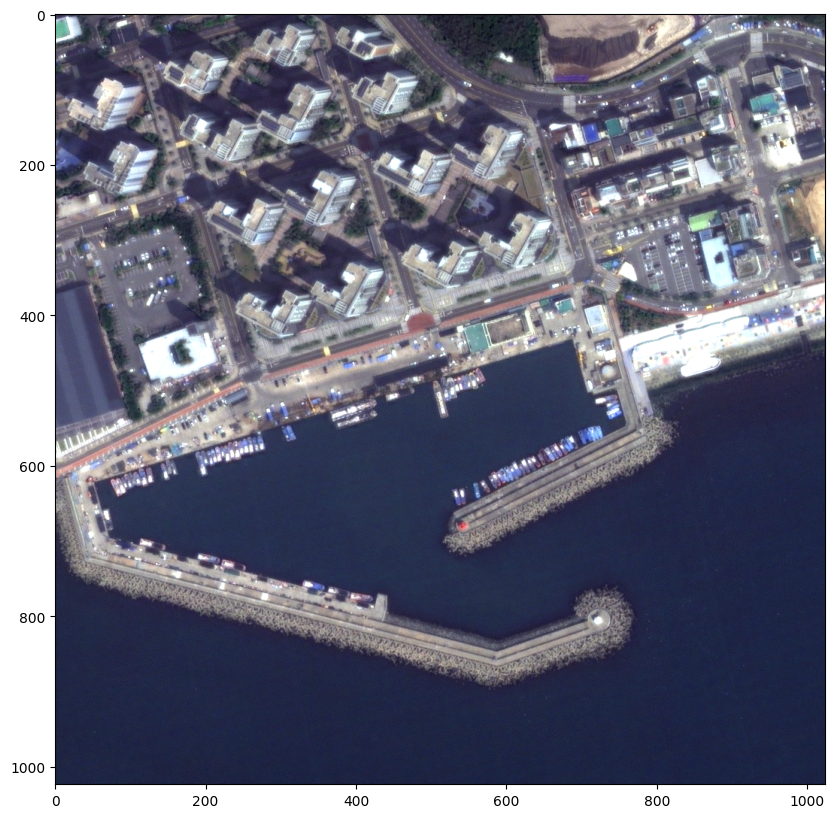

In [1]:
# --- libs
from PIL import Image
from easydict import EasyDict
import os
import json
args = EasyDict()
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt  
Image.MAX_IMAGE_PIXELS = 933120000

# --- head 

args.img_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/C1_20221227015155_09806_00006119_L1G/0-Pusan-2023-AO_1_C1_20221227015155_09806_00006119_L1G.png"


# Draw image 
img_path = args.img_path
sample_img =  Image.open("/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/04.Image_Processing/0-Pusan-2023-AO_7_C1_20230515015009_11919_00051985_L1G_PS_5.png")

plt.figure(figsize=(10,10))
plt.imshow(sample_img)


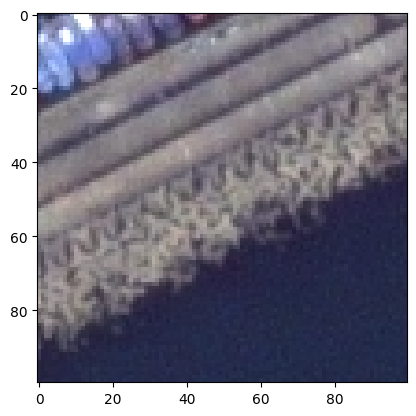

In [2]:
window_position = [100,100,600,600]

# slice
nps = np.asarray(sample_img)

x_shift_start = window_position[2]
x_shift_end   = window_position[2] + window_position[0]

y_shift_start = window_position[3]
y_shift_end  = window_position[3] + window_position[1]

obj = nps[x_shift_start:x_shift_end,y_shift_start:y_shift_end,:]
plt.imshow(obj)

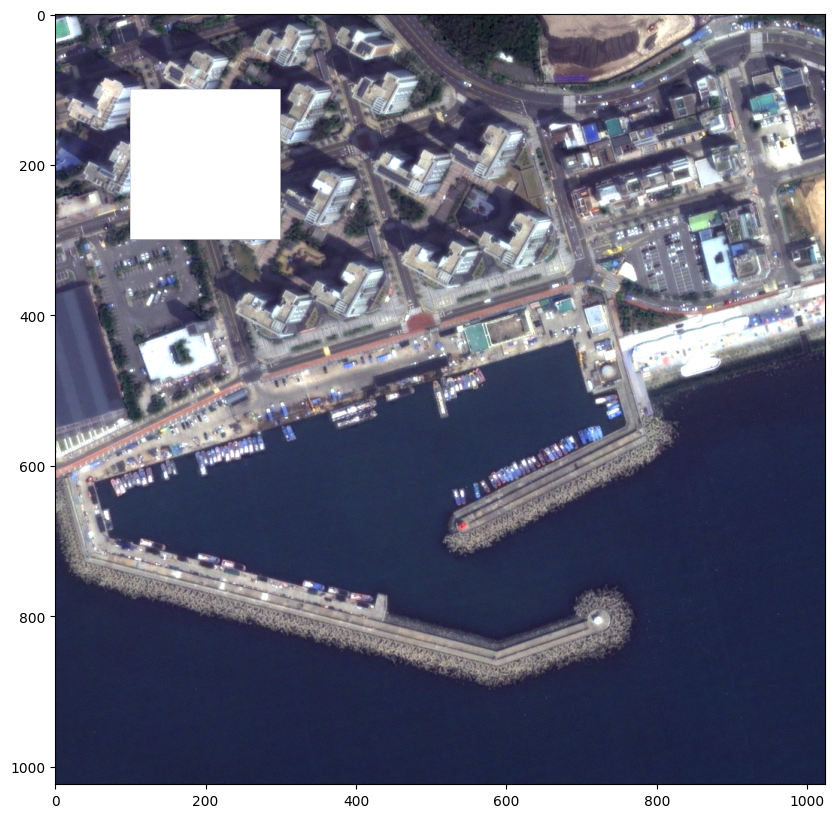

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image using PIL
sample_img = Image.open("/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/04.Image_Processing/0-Pusan-2023-AO_7_C1_20230515015009_11919_00051985_L1G_PS_5.png")

# Convert PIL image to NumPy array
sample_img_array = np.array(sample_img)

# Define the window position
window_position = [100, 100, 300, 300]

# Set the region defined by window_position to False
x_shift_start = window_position[0]
x_shift_end = window_position[2]
y_shift_start = window_position[1]
y_shift_end = window_position[3]


# Create a mask
mask = np.ones_like(sample_img_array, dtype=bool)
mask[x_shift_start:x_shift_end, y_shift_start:y_shift_end, :] = 0

result = (sample_img_array * mask).clip(0, 255).astype(np.uint8)

# Apply the mask to the original image
#masked_img = np.where(mask, sample_img_array, 0)

# Display the masked image
plt.figure(figsize=(10,10))
plt.imshow(result)
plt.show()


In [4]:
sample_img_array.shape

(1024, 1024, 4)

In [5]:
mask_a = mask.copy()
mask_a[:,:,3] = 0.01  

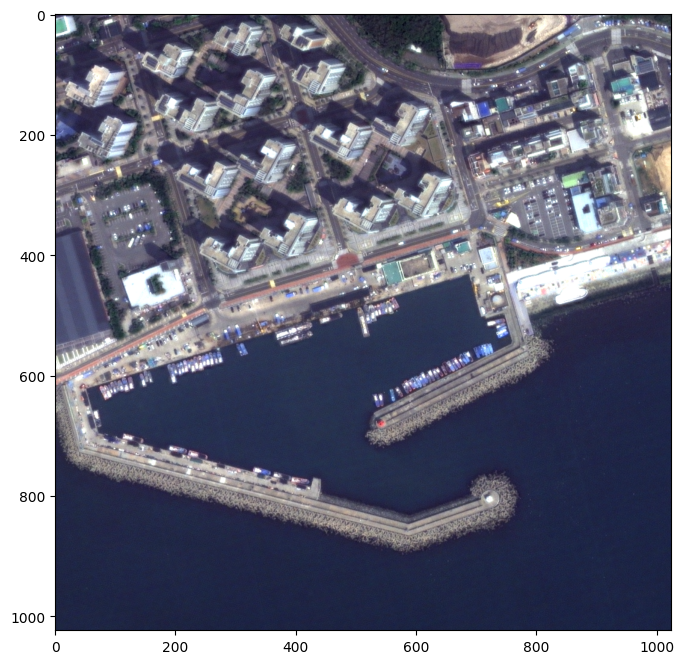

In [6]:
qwe=sample_img_array.copy() 
qwe[:,:,3] = 255
plt.figure(figsize=(8,8))
plt.imshow(qwe)

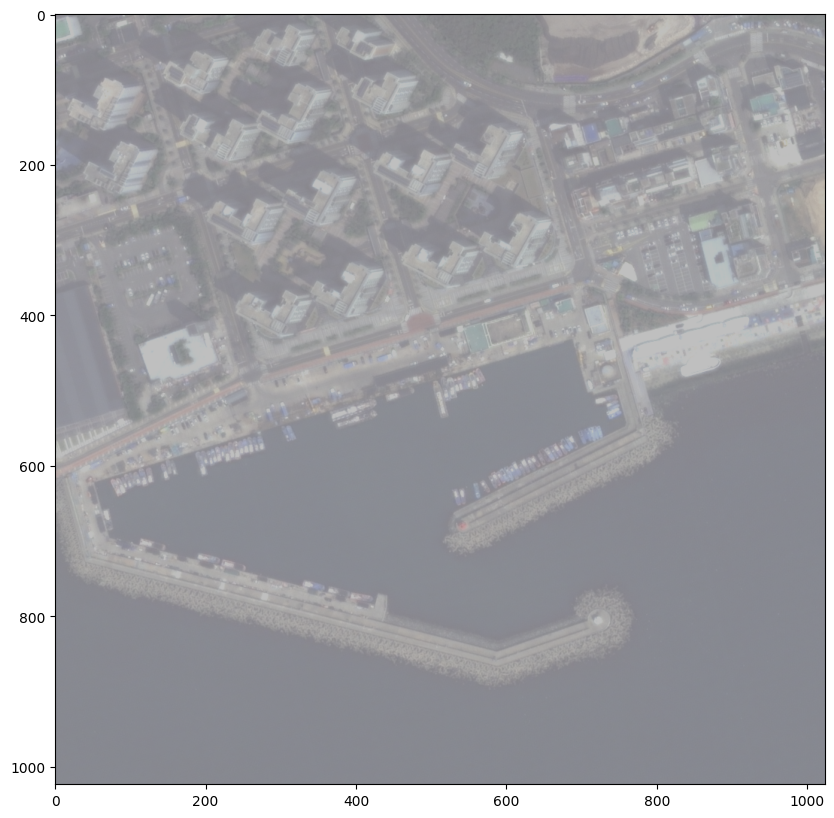

<Figure size 640x480 with 0 Axes>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image using PIL
sample_img = Image.open("/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/04.Image_Processing/0-Pusan-2023-AO_7_C1_20230515015009_11919_00051985_L1G_PS_5.png")

# Convert PIL image to NumPy array
sample_img_array = np.array(sample_img)

# Define the factor to darken the image
darken_factor = 0.5  # You can adjust this value as needed, lower values darken the image more

# Darken the image by multiplying the pixel values by the darken_factor
darkened_img = sample_img_array * darken_factor

# Ensure the pixel values remain in the valid range [0, 255]
darkened_img = np.clip(darkened_img, 0, 255).astype(np.uint8)

# Display the darkened image
plt.figure(figsize=(10,10))
plt.imshow(darkened_img)
plt.show()
plt.savefig('resu1.png')

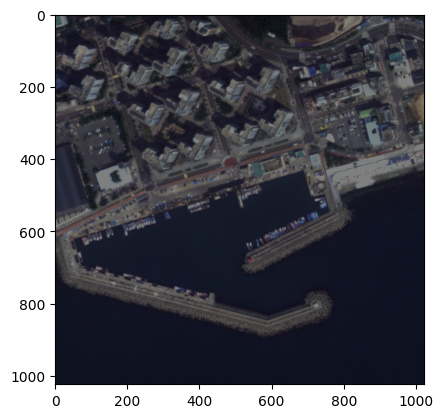

In [8]:
from PIL import Image, ImageEnhance

img = Image.open("/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/04.Image_Processing/0-Pusan-2023-AO_7_C1_20230515015009_11919_00051985_L1G_PS_5.png")

enhancer = ImageEnhance.Brightness(img)
# to reduce brightness by 50%, use factor 0.5
img = enhancer.enhance(0.5)


plt.imshow(img)
#img.show()
#img.save("image_darker.jpg")

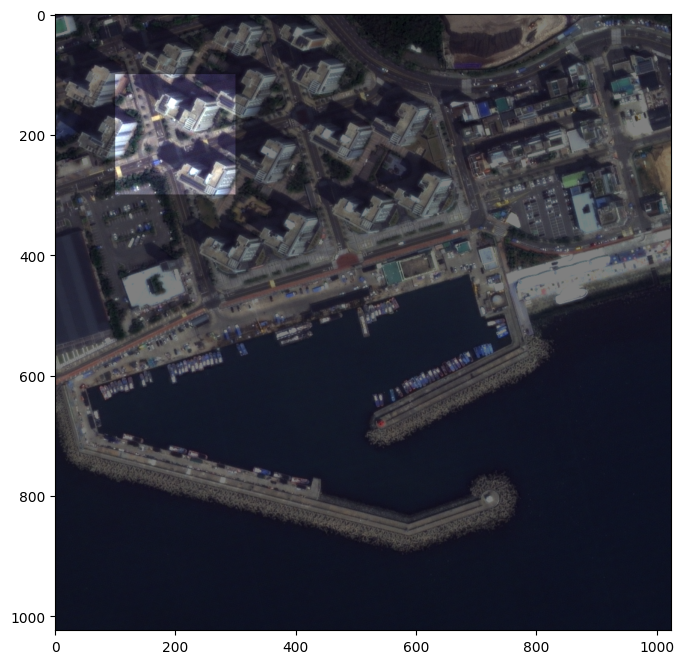

In [9]:
from PIL import Image, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt

# Load the image using PIL
img = Image.open("/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/04.Image_Processing/0-Pusan-2023-AO_7_C1_20230515015009_11919_00051985_L1G_PS_5.png")

# Convert PIL image to NumPy array
img_array = np.array(img)

# Define the window position
window_position = [100, 100, 300, 300]

# Create a mask for the masked region
mask = np.ones_like(img_array, dtype=bool)

x_shift_start, x_shift_end = window_position[0], window_position[2]
y_shift_start, y_shift_end = window_position[1], window_position[3]
mask[x_shift_start:x_shift_end, y_shift_start:y_shift_end, :] = False

# Convert the mask to uint8 type
mask = mask.astype(np.uint8) * 255

# Convert the mask back to PIL Image
mask_img = Image.fromarray(mask)

# Apply the brightness enhancement to the masked region
enhancer = ImageEnhance.Brightness(img)
enhanced_img = enhancer.enhance(0.5)

# Paste the enhanced region onto the original image using the mask
result = Image.composite(enhanced_img, img, mask_img)

# Display the result
plt.figure(figsize=(8,8))
plt.imshow(result)
plt.show()

In [15]:

def get_gaussian_pixels(box): # [w, h, cw, ch]
    
    w,h,cw,ch = box[0],box[1],box[2],box[3]
    
    r = max(w,h)
    a = cw 
    b = ch
    tmp = []
    for x in range(0,100):
        for y in range(0,100):
                
            if ( np.square(x - 50) + np.square(y - 50) ) <= r :
                tmp.append([x,y])
                
    return tmp 

In [18]:
#----

box = [10, 5, 50, 50]

tmp = get_gaussian_pixels(box)

In [36]:
[i[0] for i in tmp]

[47,
 47,
 47,
 48,
 48,
 48,
 48,
 48,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 52,
 52,
 52,
 52,
 52,
 53,
 53,
 53]

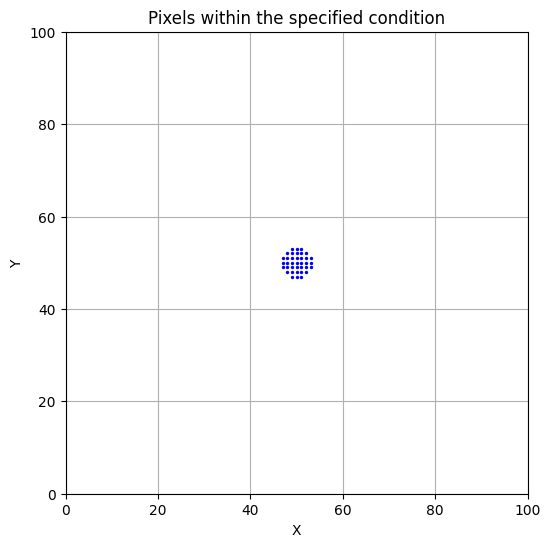

In [37]:
#----
box = [10, 5, 50, 50]

tmp = get_gaussian_pixels(box)


# Convert tmp to a NumPy array for easier manipulation

# Visualize the pixels
plt.figure(figsize=(6, 6))
plt.scatter([i[0] for i in tmp], [i[1] for i in tmp], color='blue', s=2)  # Plotting the pixels
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.gca().set_aspect('equal', adjustable='box')  # Ensure aspect ratio is maintained
plt.title('Pixels within the specified condition')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()
